# Baseline Validation： Cross-sectional DiD

### Baseline Cross-sectional DiD Model

We estimate the following regression model:

$$
\text{delta\_CAR}_{i,e} = \alpha + \beta \cdot \text{Treatment}_i + \epsilon_{i,e}
$$

Where:

- **$\text{delta\_CAR}_{i,e}$**: The change in cumulative abnormal return for firm *i* around event *e*, computed as:

  $$
  \text{delta\_CAR} = \text{CAR}_{\text{post}} - \text{CAR}_{\text{pre}}
  $$

- **$\text{Treatment}_i$**: An indicator variable equal to 1 if firm *i* is **hardware-dependent** (treatment group), and 0 if the firm belongs to the **control group**.

- **$\alpha$**: The intercept, representing the average delta CAR for control firms.

- **$\beta$**: The treatment effect — how much more (or less) the delta CAR is for hardware-dependent firms compared to control firms.

- **$\epsilon_{i,e}$**: The error term, capturing unexplained variation at the firm-event level.


In [1]:
import pandas as pd
robust_df = pd.read_csv("robust_df.csv", parse_dates=["Date", "event_date"])
cross_df = robust_df.dropna(subset=["event_id", "delta_CAR"])
cross_df = cross_df.drop_duplicates(subset=["ticker", "event_id"])



In [2]:
import statsmodels.formula.api as smf

model = smf.ols("delta_CAR ~ Treatment", data=cross_df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              delta_CAR   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.4858
Date:                Tue, 22 Apr 2025   Prob (F-statistic):              0.490
Time:                        15:40:59   Log-Likelihood:                 51.647
No. Observations:                  42   AIC:                            -99.29
Df Residuals:                      40   BIC:                            -95.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0155      0.015     -1.048      0.3

In [3]:
model =smf.ols("delta_CAR ~ Treatment + C(event_id)", data=cross_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              delta_CAR   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     5.752
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           0.000302
Time:                        15:40:59   Log-Likelihood:                 65.804
No. Observations:                  42   AIC:                            -117.6
Df Residuals:                      35   BIC:                            -105.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [4]:

model = smf.ols("delta_CAR ~ Treatment", data=cross_df).fit(cov_type='HC1')
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              delta_CAR   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.4153
Date:                Tue, 22 Apr 2025   Prob (F-statistic):              0.523
Time:                        15:40:59   Log-Likelihood:                 51.647
No. Observations:                  42   AIC:                            -99.29
Df Residuals:                      40   BIC:                            -95.82
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0155      0.010     -1.496      0.1

As a baseline validation, we estimate a cross-sectional regression of delta CAR (post-event minus pre-event cumulative abnormal return) on a treatment indicator. While the point estimate suggests that hardware-dependent firms experienced slightly more negative reactions relative to the control group (-1.58%), the result is not statistically significant (p = 0.519). This suggests that, on average, the treatment group did not respond more sharply to policy announcements over the full ±10-day window, though more dynamic specifications may reveal time-varying effects.

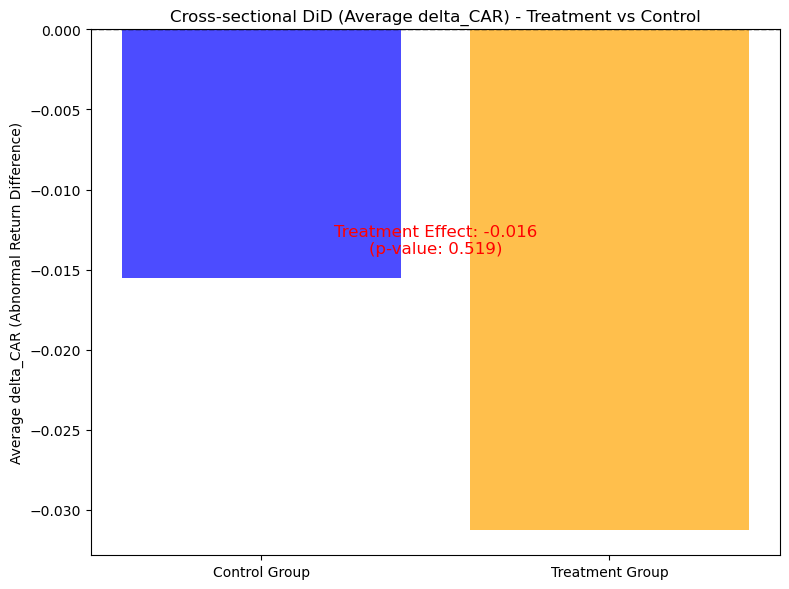

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 1. Create the model (you already have this part)
model = smf.ols("delta_CAR ~ Treatment", data=cross_df).fit(cov_type='HC1')

# 2. Extract results
treatment_effect = model.params["Treatment"]
p_value = model.pvalues["Treatment"]

# 3. Plot Cross-sectional DiD graph
# Get Treatment and Control group average delta CAR
avg_delta_car = cross_df.groupby("Treatment")["delta_CAR"].mean()

# Create plot
plt.figure(figsize=(8, 6))
plt.bar(avg_delta_car.index, avg_delta_car.values, color=["blue", "orange"], alpha=0.7)

# Add labels and title
plt.title(f"Cross-sectional DiD (Average delta_CAR) - Treatment vs Control")
plt.xticks([0, 1], ['Control Group', 'Treatment Group'])
plt.ylabel("Average delta_CAR (Abnormal Return Difference)")
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Display p-value and treatment effect on the plot
plt.text(0.5, max(avg_delta_car.values) * 0.9, 
         f"Treatment Effect: {treatment_effect:.3f}\n(p-value: {p_value:.3f})", 
         horizontalalignment='center', fontsize=12, color="red")

plt.tight_layout()
plt.show()
